In [1]:
# !pip install umap
# !pip install umap-learn
# !pip install nb_black
# !pip install plotly

In [2]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from umap import UMAP

from prince import MCA, FAMD

import plotly.express as px
from ipywidgets import interact

import seaborn as sns
import matplotlib.pyplot as plt

import ast

%matplotlib inline

<IPython.core.display.Javascript object>

In [4]:
spotify = pd.read_excel("data/Hot_100_Audio_Features.xlsx")
spotify.head()

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],3jbT1Y5MoPwEIpZndDDwVq,NaN,Adicto (with Anuel AA & Ozuna),0.0,270740.0,91.0,...,10.0,-4.803,0.0,0.0735,0.01700,0.000016,0.1790,0.623,80.002,4.0
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",2VxeLyX666F8uXCJ0dZF8B,NaN,A Star Is Born Soundtrack,0.0,215733.0,88.0,...,7.0,-6.362,1.0,0.0308,0.37100,0.000000,0.2310,0.323,95.799,4.0
3,EnemiesPost Malone Featuring DaBaby,Post Malone Featuring DaBaby,Enemies,"['dfw rap', 'melodic rap', 'rap']",0Xek5rqai2jcOWCYWJfVCF,NaN,Hollywood's Bleeding,1.0,196760.0,86.0,...,6.0,-4.169,1.0,0.2100,0.05880,0.000000,0.0955,0.667,76.388,4.0
4,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",2biNa12dMbHJrHVFRt8JyO,https://p.scdn.co/mp3-preview/fa6fa6f6f363be29...,Bacc At It Again,1.0,228185.0,61.0,...,8.0,-5.725,0.0,0.1680,0.00124,0.000001,0.0716,0.856,135.979,4.0


<IPython.core.display.Javascript object>

In [5]:
spotify = spotify.drop_duplicates()

<IPython.core.display.Javascript object>

In [6]:
spotify = spotify.drop(
    columns=[
        "spotify_track_id",
        "spotify_track_preview_url",
    ]
)

<IPython.core.display.Javascript object>

In [7]:
spotify.shape

(28470, 20)

<IPython.core.display.Javascript object>

In [8]:
spotify.head()

,SongID,Performer,Song,spotify_genre,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],Adicto (with Anuel AA & Ozuna),0.0,270740.0,91.0,0.734,0.836,10.0,-4.803,0.0,0.0735,0.01700,0.000016,0.1790,0.623,80.002,4.0
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",A Star Is Born Soundtrack,0.0,215733.0,88.0,0.572,0.385,7.0,-6.362,1.0,0.0308,0.37100,0.000000,0.2310,0.323,95.799,4.0
3,EnemiesPost Malone Featuring DaBaby,Post Malone Featuring DaBaby,Enemies,"['dfw rap', 'melodic rap', 'rap']",Hollywood's Bleeding,1.0,196760.0,86.0,0.542,0.674,6.0,-4.169,1.0,0.2100,0.05880,0.000000,0.0955,0.667,76.388,4.0
4,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",Bacc At It Again,1.0,228185.0,61.0,0.948,0.623,8.0,-5.725,0.0,0.1680,0.00124,0.000001,0.0716,0.856,135.979,4.0


<IPython.core.display.Javascript object>

In [9]:
spotify.dtypes

SongID                        object
Performer                     object
Song                          object
spotify_genre                 object
spotify_track_album           object
spotify_track_explicit       float64
spotify_track_duration_ms    float64
spotify_track_popularity     float64
danceability                 float64
energy                       float64
key                          float64
loudness                     float64
mode                         float64
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
time_signature               float64
dtype: object

<IPython.core.display.Javascript object>

In [10]:
spotify.isna().mean()

SongID                       0.000000
Performer                    0.000000
Song                         0.000000
spotify_genre                0.043133
spotify_track_album          0.166737
spotify_track_explicit       0.166526
spotify_track_duration_ms    0.166526
spotify_track_popularity     0.166526
danceability                 0.168739
energy                       0.168739
key                          0.168739
loudness                     0.168739
mode                         0.168739
speechiness                  0.168739
acousticness                 0.168739
instrumentalness             0.168739
liveness                     0.168739
valence                      0.168739
tempo                        0.168739
time_signature               0.168739
dtype: float64

<IPython.core.display.Javascript object>

# Fill null values

In [11]:
spotify["spotify_track_album"].fillna(" ", inplace=True)
spotify["spotify_genre"].fillna("[]", inplace=True)

# Reformat the genre list
spotify["spotify_genre_list"] = spotify["spotify_genre"].apply(ast.literal_eval)

<IPython.core.display.Javascript object>

In [12]:
spotify.rename(
    columns={
        "spotify_genre": "genre_str",
        "spotify_genre_list": "genre_list",
        "spotify_track_album": "album",
        "spotify_track_explicit": "explicit",
    },
    inplace=True,
)

<IPython.core.display.Javascript object>

In [13]:
# Try to change all columns to numeric
# if theres an error, ignore it and move to next column
spotify = spotify.apply(pd.to_numeric, errors="ignore")

<IPython.core.display.Javascript object>

In [14]:
spotify["explicit"].fillna("Not filled", inplace=True)

# Fill N/As with mean values
null_cols = [
    "spotify_track_duration_ms",
    "spotify_track_popularity",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "time_signature",
]

for col in null_cols:
    spotify[col].fillna(spotify[col].mean(), inplace=True)

<IPython.core.display.Javascript object>

In [15]:
spotify["genre_str"].value_counts().head(30)

[]                                                                                                      3769
['contemporary country', 'country', 'country road']                                                      314
['contemporary country', 'country', 'country road', 'modern country rock']                               279
['dance pop', 'pop', 'post-teen pop']                                                                    251
['glee club', 'hollywood', 'post-teen pop']                                                              205
['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap']                         138
['deep adult standards']                                                                                 129
['adult standards', 'easy listening', 'lounge']                                                          128
['bubblegum pop']                                                                                        127
['freestyle']      

<IPython.core.display.Javascript object>

In [16]:
genre_list = ["rap", "hip hop", "metal", "country", "pop", "disco", "r&b"]

for genre in genre_list:
    spotify[genre] = spotify["genre_str"].str.contains(fr"\b{genre}\b")

spotify.loc[spotify["pop"], "genre_label"] = "pop"
spotify.loc[spotify["disco"], "genre_label"] = "disco"
spotify.loc[spotify["r&b"], "genre_label"] = "r&b"
spotify.loc[spotify["rap"], "genre_label"] = "rap"
spotify.loc[spotify["hip hop"], "genre_label"] = "hip hop"
spotify.loc[spotify["metal"], "genre_label"] = "metal"
spotify.loc[spotify["country"], "genre_label"] = "country"

spotify["genre_label"].value_counts()

spotify = spotify.drop(columns=genre_list)

<IPython.core.display.Javascript object>

In [17]:
spotify["genre_label"].isna().sum()

10293

<IPython.core.display.Javascript object>

In [18]:
spotify

,SongID,Performer,Song,genre_str,album,explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_list,genre_label
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],Adicto (with Anuel AA & Ozuna),0,270740.000000,91.000000,0.734000,0.836000,...,0.000000,0.073500,0.017000,0.000016,0.179000,0.623000,80.002000,4.000000,[pop reggaeton],pop
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",,Not filled,221390.860845,40.520755,0.598255,0.618042,...,0.729612,0.071769,0.296133,0.033268,0.192624,0.605261,120.199492,3.930745,"[arkansas country, contemporary country, count...",country
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",A Star Is Born Soundtrack,0,215733.000000,88.000000,0.572000,0.385000,...,1.000000,0.030800,0.371000,0.000000,0.231000,0.323000,95.799000,4.000000,"[dance pop, pop]",pop
3,EnemiesPost Malone Featuring DaBaby,Post Malone Featuring DaBaby,Enemies,"['dfw rap', 'melodic rap', 'rap']",Hollywood's Bleeding,1,196760.000000,86.000000,0.542000,0.674000,...,1.000000,0.210000,0.058800,0.000000,0.095500,0.667000,76.388000,4.000000,"[dfw rap, melodic rap, rap]",rap
4,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",Bacc At It Again,1,228185.000000,61.000000,0.948000,0.623000,...,0.000000,0.168000,0.001240,0.000001,0.071600,0.856000,135.979000,4.000000,"[dfw rap, rap, southern hip hop, trap]",hip hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28487,"Tonight, TonightThe Smashing Pumpkins",The Smashing Pumpkins,"Tonight, Tonight","['alternative metal', 'alternative rock', 'gru...",Mellon Collie And The Infinite Sadness (Deluxe...,0,254626.000000,69.000000,0.287000,0.670000,...,1.000000,0.036800,0.000063,0.748000,0.237000,0.222000,148.928000,4.000000,"[alternative metal, alternative rock, grunge, ...",metal
28488,Tonight's The Night (Gonna Be Alright)Rod Stewart,Rod Stewart,Tonight's The Night (Gonna Be Alright),"['adult standards', 'mellow gold', 'soft rock']",A Night on the Town (Deluxe Edition),0,237120.000000,55.000000,0.550000,0.514000,...,1.000000,0.052300,0.336000,0.125000,0.382000,0.724000,136.542000,3.000000,"[adult standards, mellow gold, soft rock]",NaN
28489,Tonight's The NightBLACKstreet,BLACKstreet,Tonight's The Night,"['boy band', 'dance pop', 'hip hop', 'hip pop'...",Blackstreet,0,258026.000000,32.000000,0.585000,0.573000,...,0.000000,0.075900,0.133000,0.000011,0.173000,0.591000,76.060000,4.000000,"[boy band, dance pop, hip hop, hip pop, neo so...",hip hop
28490,Tonight's The NightS.S.O.,S.S.O.,Tonight's The Night,[],Funky Chicken: Belgian Grooves From The 70's,0,170506.000000,13.000000,0.598255,0.618042,...,0.729612,0.071769,0.296133,0.033268,0.192624,0.605261,120.199492,3.930745,[],NaN


<IPython.core.display.Javascript object>

In [19]:
# Isolate numbers
nums_spot = spotify.select_dtypes("number")

<IPython.core.display.Javascript object>

In [20]:
model_df = spotify.drop(
    columns=[
        "SongID",
        "Performer",
        "Song",
        "genre_str",
        "album",
        "genre_list",
        "explicit",
        "spotify_track_duration_ms",
    ]
)

model_df = model_df.dropna()
model_df

,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_label
0,91.000000,0.734000,0.836000,10.000000,-4.803000,0.000000,0.073500,0.017000,0.000016,0.179000,0.623000,80.002000,4.000000,pop
1,40.520755,0.598255,0.618042,5.239584,-8.714603,0.729612,0.071769,0.296133,0.033268,0.192624,0.605261,120.199492,3.930745,country
2,88.000000,0.572000,0.385000,7.000000,-6.362000,1.000000,0.030800,0.371000,0.000000,0.231000,0.323000,95.799000,4.000000,pop
3,86.000000,0.542000,0.674000,6.000000,-4.169000,1.000000,0.210000,0.058800,0.000000,0.095500,0.667000,76.388000,4.000000,rap
4,61.000000,0.948000,0.623000,8.000000,-5.725000,0.000000,0.168000,0.001240,0.000001,0.071600,0.856000,135.979000,4.000000,hip hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28483,75.000000,0.686000,0.783000,4.000000,-4.977000,1.000000,0.119000,0.076400,0.000000,0.163000,0.814000,99.978000,4.000000,pop
28484,10.000000,0.597000,0.743000,0.000000,-9.767000,1.000000,0.036200,0.742000,0.000000,0.689000,0.965000,141.836000,4.000000,pop
28487,69.000000,0.287000,0.670000,6.000000,-9.381000,1.000000,0.036800,0.000063,0.748000,0.237000,0.222000,148.928000,4.000000,metal
28489,32.000000,0.585000,0.573000,6.000000,-5.561000,0.000000,0.075900,0.133000,0.000011,0.173000,0.591000,76.060000,4.000000,hip hop


<IPython.core.display.Javascript object>

In [21]:
model_df["genre_label"] = model_df["genre_label"].astype("category").cat.codes
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18177 entries, 0 to 28491
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   spotify_track_popularity  18177 non-null  float64
 1   danceability              18177 non-null  float64
 2   energy                    18177 non-null  float64
 3   key                       18177 non-null  float64
 4   loudness                  18177 non-null  float64
 5   mode                      18177 non-null  float64
 6   speechiness               18177 non-null  float64
 7   acousticness              18177 non-null  float64
 8   instrumentalness          18177 non-null  float64
 9   liveness                  18177 non-null  float64
 10  valence                   18177 non-null  float64
 11  tempo                     18177 non-null  float64
 12  time_signature            18177 non-null  float64
 13  genre_label               18177 non-null  int8   
dtypes: flo

<IPython.core.display.Javascript object>

In [44]:
samp = model_df.sample(10000, axis=0, random_state=66)

X = samp.drop(columns=["spotify_track_popularity", "genre_label"])
y = samp["genre_label"]

# np.random.seed(66)

# indices = np.random.choice(70000, 10000)
# X = model_df[indices] / 255.0
# y = model_df[indices]

# print(X.shape, y.shape)

<IPython.core.display.Javascript object>

In [45]:
y

19634    4
24253    4
28102    2
8526     1
19572    4
        ..
24852    4
11445    4
24602    2
17501    1
26417    6
Name: genre_label, Length: 10000, dtype: int8

<IPython.core.display.Javascript object>

In [46]:
pca = PCA(n_components=2)

pca_spot = pd.DataFrame(pca.fit_transform(X))
pca_spot = pca_spot.join(y).dropna()
# pca_spot[0] = pca_spot[0] / 255
# pca_spot[1] = pca_spot[0] / 255
pca_spot["genre_label"] = pca_spot["genre_label"].astype(int)

<IPython.core.display.Javascript object>

In [47]:
pca.explained_variance_ratio_

array([0.96925938, 0.0152481 ])

<IPython.core.display.Javascript object>

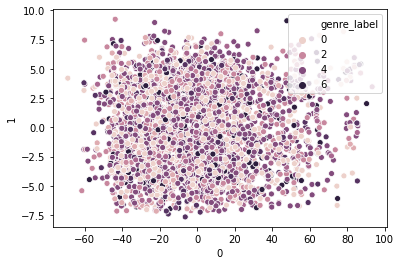

<IPython.core.display.Javascript object>

In [48]:
sns.scatterplot(pca_spot[0], pca_spot[1], hue="genre_label", data=pca_spot)
plt.show()

In [41]:
plt.figure(figsize=(10, 8))
colours = ["r", "b", "g", "c", "m", "y", "k", "r", "burlywood", "chartreuse"]
for i, row in pca_spot.iterrows():
    plt.text(
        row[0],
        row[1],
        str(row["genre_label"]),
        color=colours[int(row["genre_label"])],
        fontdict={"weight": "bold", "size": 10},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

ValueError: Image size of 90657x43977 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x576 with 1 Axes>

<IPython.core.display.Javascript object>

In [27]:
@interact
def scatterplot(x=nums_spot.columns, y=nums_spot.columns, hue="genre_label"):
    colours = ["r", "b", "g", "c", "m", "y", "k", "r", "burlywood", "chartreuse"]
    plt.figure(figsize=(15, 8))
    fig = px.scatter(x=x, y=y, color=hue, data_frame=spotify.dropna())
    fig.show()

interactive(children=(Dropdown(description='x', options=('spotify_track_duration_ms', 'spotify_track_popularit…

<IPython.core.display.Javascript object>

In [28]:
@interact
def boxplot(y=nums_spot.columns, hue=["genre_label"]):
    plt.figure(figsize=(15, 8))
    fig = px.box(x="genre_label", y=y, color=hue, data_frame=spotify.dropna())
    fig.show()

interactive(children=(Dropdown(description='y', options=('spotify_track_duration_ms', 'spotify_track_popularit…

<IPython.core.display.Javascript object>

# ---------------------------------------------------------------------------------------
# https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification
# ---------------------------------------------------------------------------------------

In [29]:
genre = pd.read_csv("data/features_30_sec.csv")

<IPython.core.display.Javascript object>

In [30]:
genre.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


<IPython.core.display.Javascript object>

In [31]:
genre.isna().mean()

filename                   0.0
length                     0.0
chroma_stft_mean           0.0
chroma_stft_var            0.0
rms_mean                   0.0
rms_var                    0.0
spectral_centroid_mean     0.0
spectral_centroid_var      0.0
spectral_bandwidth_mean    0.0
spectral_bandwidth_var     0.0
rolloff_mean               0.0
rolloff_var                0.0
zero_crossing_rate_mean    0.0
zero_crossing_rate_var     0.0
harmony_mean               0.0
harmony_var                0.0
perceptr_mean              0.0
perceptr_var               0.0
tempo                      0.0
mfcc1_mean                 0.0
mfcc1_var                  0.0
mfcc2_mean                 0.0
mfcc2_var                  0.0
mfcc3_mean                 0.0
mfcc3_var                  0.0
mfcc4_mean                 0.0
mfcc4_var                  0.0
mfcc5_mean                 0.0
mfcc5_var                  0.0
mfcc6_mean                 0.0
mfcc6_var                  0.0
mfcc7_mean                 0.0
mfcc7_va

<IPython.core.display.Javascript object>

In [32]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

<IPython.core.display.Javascript object>

In [33]:
genre.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


<IPython.core.display.Javascript object>

In [34]:
nums_gen = genre.select_dtypes("number")


@interact
def boxplot(y=nums_gen.columns, hue=["label"]):
    plt.figure(figsize=(15, 8))
    fig = px.box(x="label", y=y, color=hue, data_frame=genre.dropna())
    fig.show()

interactive(children=(Dropdown(description='y', options=('length', 'chroma_stft_mean', 'chroma_stft_var', 'rms…

<IPython.core.display.Javascript object>

In [35]:
@interact
def scatterplot(x=nums_gen.columns, y=nums_gen.columns, hue=["label"]):
    plt.figure(figsize=(15, 8))
    fig = px.scatter(x=x, y=y, color=hue, data_frame=genre.dropna())
    fig.show()

interactive(children=(Dropdown(description='x', options=('length', 'chroma_stft_mean', 'chroma_stft_var', 'rms…

<IPython.core.display.Javascript object>